#WASZUUM L01

# Wykrywanie anomalii sieciowy

## 1 Podstawy

- Obliczenia numeryczne
- Czytanie danych
- Wizualizacja

## Plan

- Wprowadzenie 15 min
- Czytanie danych 20 min
- Wizualziacja 20 min
- Obliczania 25 min
- Podsumowanie 10 min

In [ ]:
#@title download data file
!gdown https://drive.google.com/uc?id=1xJ7TJmKA3ft7IVnOF9YrsT8bM76sO-rv



Downloading...
From: https://drive.google.com/uc?id=1xJ7TJmKA3ft7IVnOF9YrsT8bM76sO-rv
To: /content/ucirtr-cyfronet.log
100% 118k/118k [00:00<00:00, 33.9MB/s]


In [ ]:
#@title list file
!ls ucirtr-cyfronet.log

ucirtr-cyfronet.log


# MRTG Format

Format plików *mrtg-logfile*  cytowany z  https://oss.oetiker.ch/mrtg/doc/mrtg-logfile.en.html

## The first Line

The first line has 3 numbers which are:

### A (1st column)

A timestamp of when MRTG last ran for this interface. The timestamp is the number of non-skip seconds passed since the standard UNIX "epoch" of midnight on 1st of January 1970 GMT.

### B (2nd column)
The "incoming bytes counter" value.

### C (3rd column)
The "outgoing bytes counter" value.

## The rest of the File

The second and remaining lines of the file contains 5 numbers which are:

### A (1st column)
The Unix timestamp for the point in time the data on this line is relevant. Note that the interval between timestamps increases as you progress through the file. At first it is 5 minutes and at the end it is one day between two lines.

### B (2nd column)

The average incoming transfer rate in bytes per second. This is valid for the time between the A value of the current line and the A value of the previous line.

### C (3rd column)

The average outgoing transfer rate in bytes per second since the previous measurement.

### D (4th column)

The maximum incoming transfer rate in bytes per second for the current interval. This is calculated from all the updates which have occured in the current interval. If the current interval is 1 hour, and updates have occured every 5 minutes, it will be the biggest 5 minute transfer rate seen during the hour.

### E (5th column)

The maximum outgoing transfer rate in bytes per second for the current interval.

In [ ]:
#@title Required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import jax
import jax.numpy as jnp

# Czytanie danych / Reading data

In [ ]:
#@title headers?
!head 'ucirtr-cyfronet.log'

1574068803 297625706837208 136073339323105
1574068803 154331882 36341859 154331882 36341859
1574068503 150211888 41255850 150211888 41255850
1574068500 150057948 41266531 150211888 42056988
1574068200 138856229 42005252 152899249 42056988
1574067900 152667717 38159916 152899249 38176856
1574067600 135476217 36817321 135534357 36906375
1574067300 129724257 28030319 130108230 30930700
1574067000 130243341 30867415 143619396 30930700
1574066700 143203240 24647779 143619396 28018010


In [ ]:
#@title Initial try
counters = pd.read_csv('ucirtr-cyfronet.log')

In [ ]:
counters

,1574068803 297625706837208 136073339323105
0,1574068803 154331882 36341859 154331882 36341859
1,1574068503 150211888 41255850 150211888 41255850
2,1574068500 150057948 41266531 150211888 42056988
3,1574068200 138856229 42005252 152899249 42056988
4,1574067900 152667717 38159916 152899249 38176856
...,...
2531,1505606400 10170789 30445926 40623316 56744526
2532,1505520000 26632779 18698728 111451077 49603291
2533,1505433600 28299196 16308216 92813412 40654395
2534,1505347200 38873001 17792879 157782909 44368202


#TASK 1: Czytanie danych

Read and add meaningful names for columns

for example  columns A B C D E --> 'timestamp','incoming','outgoing','max_incoming','max_outgoing'

In [ ]:
#@title read and add meaningful names for columns
# for example  columns A B C D E --> 'timestamp','incoming','outgoing','max_incoming','max_outgoing'
counters = pd.read_csv(
    'ucirtr-cyfronet.log', skiprows=1, sep=' ',
    names=['timestamp','incoming','outgoing','max_incoming','max_outgoing'])

In [ ]:
counters.describe()

,timestamp,incoming,outgoing,max_incoming,max_outgoing
count,2.536000e+03,2.536000e+03,2.536000e+03,2.536000e+03,2.536000e+03
mean,1.562319e+09,3.086986e+07,1.320990e+07,5.791597e+07,2.741520e+07
std,1.901715e+07,3.151127e+07,1.610132e+07,5.082011e+07,2.845913e+07
min,1.505261e+09,6.204440e+05,2.755450e+05,2.163545e+06,1.222723e+06
25%,1.560017e+09,9.262625e+06,7.091708e+06,1.795923e+07,1.316191e+07
50%,1.572340e+09,1.923035e+07,1.131307e+07,3.425900e+07,2.683679e+07
75%,1.573830e+09,3.872701e+07,1.641092e+07,1.032322e+08,3.689603e+07
max,1.574069e+09,1.755527e+08,5.266505e+08,3.366469e+08,6.163998e+08


In [ ]:
counters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2536 entries, 0 to 2535
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   timestamp     2536 non-null   int64
 1   incoming      2536 non-null   int64
 2   outgoing      2536 non-null   int64
 3   max_incoming  2536 non-null   int64
 4   max_outgoing  2536 non-null   int64
dtypes: int64(5)
memory usage: 99.2 KB


# TASK 2: Zamieńmy timestamp na odpowiedni typ
# Let's replace timestamp with the appropriate type


In [ ]:
counters.timestamp = pd.to_datetime(counters.timestamp, unit='s')
counters.head()

,timestamp,incoming,outgoing,max_incoming,max_outgoing
0,2019-11-18 09:20:03,154331882,36341859,154331882,36341859
1,2019-11-18 09:15:03,150211888,41255850,150211888,41255850
2,2019-11-18 09:15:00,150057948,41266531,150211888,42056988
3,2019-11-18 09:10:00,138856229,42005252,152899249,42056988
4,2019-11-18 09:05:00,152667717,38159916,152899249,38176856


In [ ]:
counters.tail()

,timestamp,incoming,outgoing,max_incoming,max_outgoing
2531,2017-09-17,10170789,30445926,40623316,56744526
2532,2017-09-16,26632779,18698728,111451077,49603291
2533,2017-09-15,28299196,16308216,92813412,40654395
2534,2017-09-14,38873001,17792879,157782909,44368202
2535,2017-09-13,40292444,15357511,162988733,40832989


### TASK 3: Indexing the table using the timestamp
Indeksuj tabelę przy użyciu znacznika czasu

In [ ]:
counters.index

RangeIndex(start=0, stop=2536, step=1)

In [ ]:
counters.set_index('timestamp', inplace=True)
counters.head()

,incoming,outgoing,max_incoming,max_outgoing
timestamp,,,,
2019-11-18 09:20:03,154331882,36341859,154331882,36341859
2019-11-18 09:15:03,150211888,41255850,150211888,41255850
2019-11-18 09:15:00,150057948,41266531,150211888,42056988
2019-11-18 09:10:00,138856229,42005252,152899249,42056988
2019-11-18 09:05:00,152667717,38159916,152899249,38176856


In [ ]:
counters.index

DatetimeIndex(['2019-11-18 09:20:03', '2019-11-18 09:15:03',
               '2019-11-18 09:15:00', '2019-11-18 09:10:00',
               '2019-11-18 09:05:00', '2019-11-18 09:00:00',
               '2019-11-18 08:55:00', '2019-11-18 08:50:00',
               '2019-11-18 08:45:00', '2019-11-18 08:40:00',
               ...
               '2017-09-22 00:00:00', '2017-09-21 00:00:00',
               '2017-09-20 00:00:00', '2017-09-19 00:00:00',
               '2017-09-18 00:00:00', '2017-09-17 00:00:00',
               '2017-09-16 00:00:00', '2017-09-15 00:00:00',
               '2017-09-14 00:00:00', '2017-09-13 00:00:00'],
              dtype='datetime64[ns]', name='timestamp', length=2536, freq=None)

In [ ]:
display(counters.incoming)
print('look incoming by timestamp 2019-11-18 08:25:00')
print(' ')
display(counters.loc[pd.to_datetime('2019-11-18 08:25:00'),'incoming'])
print()
print('look by numerical index, for row 4 and column 2')
display(counters.iloc[4,2])

timestamp
2019-11-18 09:20:03    154331882
2019-11-18 09:15:03    150211888
2019-11-18 09:15:00    150057948
2019-11-18 09:10:00    138856229
2019-11-18 09:05:00    152667717
                         ...    
2017-09-17 00:00:00     10170789
2017-09-16 00:00:00     26632779
2017-09-15 00:00:00     28299196
2017-09-14 00:00:00     38873001
2017-09-13 00:00:00     40292444
Name: incoming, Length: 2536, dtype: int64

look incoming by timestamp 2019-11-18 08:25:00
 


74457450


look by numerical index, for row 4 and column 2


152899249

# Wizualizacja
Pandas oferuje podstawową wizualizację, ale jak chcemy dopracowac szczegóły to trzeba ręcznie

## Visualization
  Pandas offers basic visualization, but if you want to refine the details, you have to do it manually


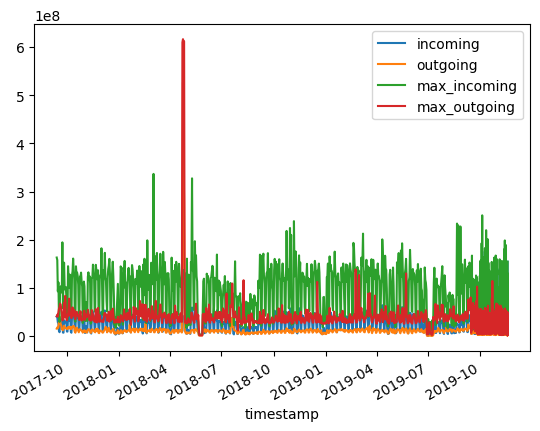

In [ ]:
counters.plot();

### TASK 4: Wykres liniowy
Line graph

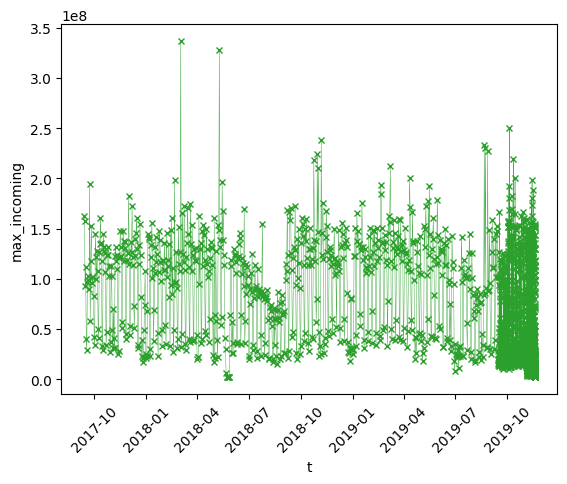

In [ ]:
plt.plot(counters.index,counters.max_incoming,'x-', color='tab:green',ms=4.5, lw=0.3)
plt.xticks(rotation=45)
plt.xlabel('t')
plt.ylabel('max_incoming');

### TASK 5: Wykresy rozkładów
### Distribution charts



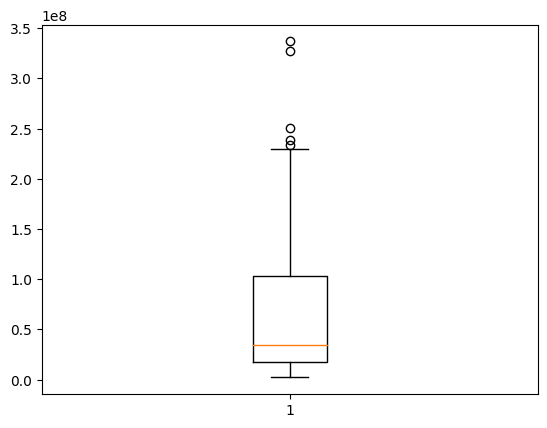

In [ ]:
plt.boxplot(counters.max_incoming);

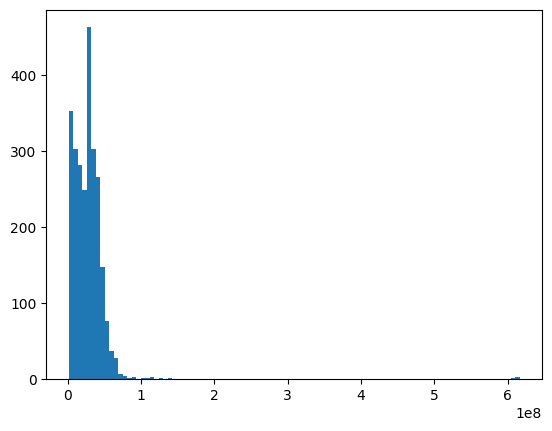

In [ ]:
plt.hist(counters.max_outgoing,bins=100);

### Wykresy rozrzutu (relacji)
Scatterplots (relation between variables)


### Seaborn

Wizualizacja statystyczna

```
sns.set()
```
dla ładniejszych wykresów

#TASK 6: Wykresy rozrzutu

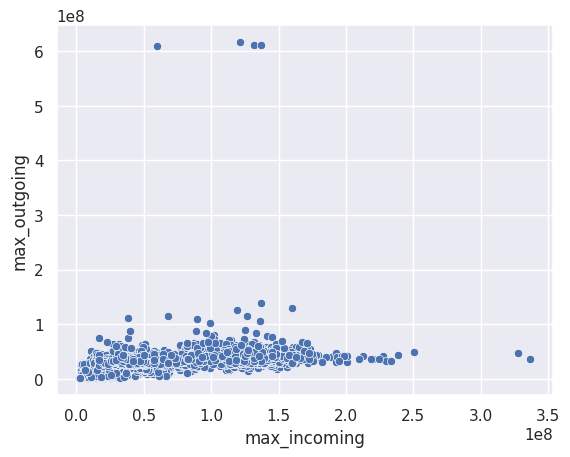

In [ ]:
sns.set()
sns.scatterplot(data=counters,x='max_incoming',y='max_outgoing');

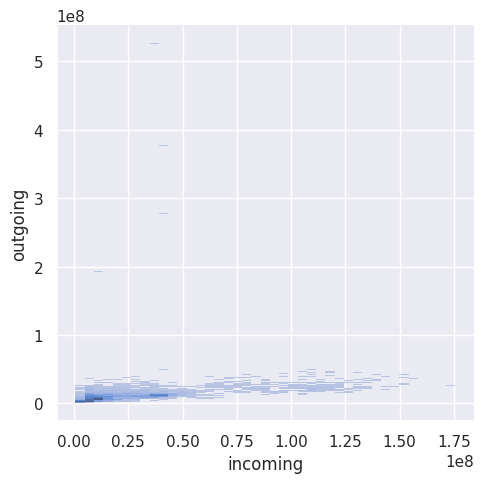

In [ ]:
#sns.displot(data=counters, x='max_incoming', y='max_outgoing',kind='kde');
sns.displot(data=counters, x='incoming', y='outgoing');

#TASK 7: Zaznaczmy dane nowsze niż `2019-1-18 08:25:00` innym kolorem

Let's mark data newer than `2019-1-18 08:25:00` with a different color

,incoming,outgoing,max_incoming,max_outgoing,nowe
timestamp,,,,,
2019-11-18 09:20:03,154331882,36341859,154331882,36341859,True
2019-11-18 09:15:03,150211888,41255850,150211888,41255850,True
2019-11-18 09:15:00,150057948,41266531,150211888,42056988,True
2019-11-18 09:10:00,138856229,42005252,152899249,42056988,True
2019-11-18 09:05:00,152667717,38159916,152899249,38176856,True


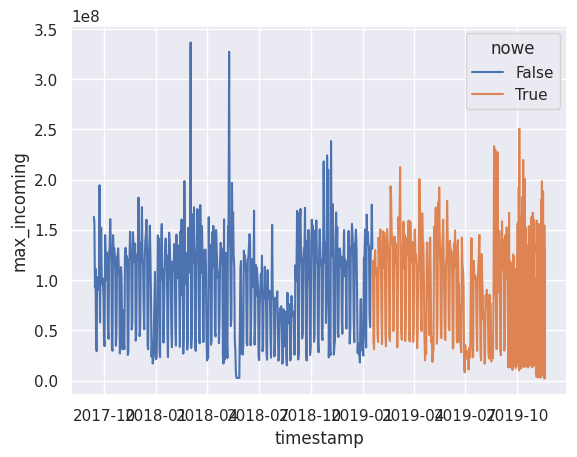

In [ ]:
df = counters.copy()
df['nowe'] = df.index > pd.to_datetime('2019-1-18 08:25:00')
display(df.head())

ax = sns.lineplot(x='timestamp',y='max_incoming', hue='nowe', data=df);


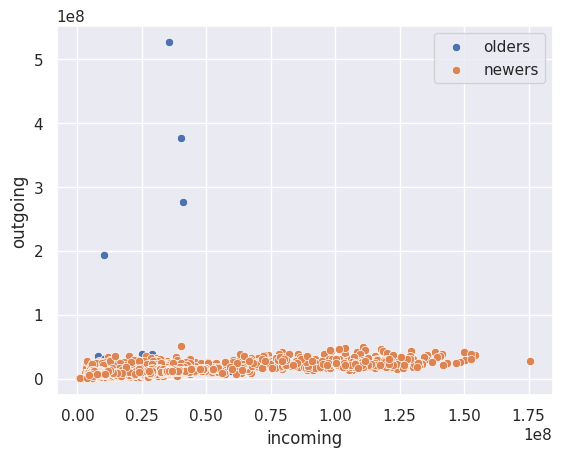

In [ ]:
olders = counters.index <= pd.to_datetime('2019-1-18 08:25:00')
newers = counters.index > pd.to_datetime('2019-1-18 08:25:00')
sns.scatterplot(counters[olders],x='incoming',y='outgoing', label='olders');
sns.scatterplot(counters[newers],x='incoming',y='outgoing', label='newers');


### Programowanie tablicowe
Array computations

Programowanie tablicowe jest podstawowym API w bibliotekach do uczenia maszynowego i analizy danych.

Array computations are the core API in ML and data analysis libraries

    Tablice wielowymiarowe, generalizacja macierzy i wektorów
    numpy
    jax



In [ ]:
t = counters.index.astype(np.int64)
display(t)

Index([1574068803000000000, 1574068503000000000, 1574068500000000000,
       1574068200000000000, 1574067900000000000, 1574067600000000000,
       1574067300000000000, 1574067000000000000, 1574066700000000000,
       1574066400000000000,
       ...
       1506038400000000000, 1505952000000000000, 1505865600000000000,
       1505779200000000000, 1505692800000000000, 1505606400000000000,
       1505520000000000000, 1505433600000000000, 1505347200000000000,
       1505260800000000000],
      dtype='int64', name='timestamp', length=2536)

In [ ]:
[np.mean(t), np.std(t), np.max(t), np.min(t)] # and many others

[1.562319068969243e+18,
 1.9013402207785144e+16,
 1574068803000000000,
 1505260800000000000]

In [ ]:
t*t+t

Index([ 5595539865461251584, -7648278093809441280, -1933306122221795328,
       -7839970489123663872,  1371437959879350272,  7254175151077695488,
       -8638502989238179840,  9033635760060379136,  4930359177844717568,
       -2501588662175612928,
       ...
        2778857734900613120, -2546725384694923264, -8762564643890987008,
        2578084031021973504, -5418267507375144960,  4141868888336760832,
       -5634994929261412352,  2144629187249438720,  9033997164159762432,
       -3413635072239992832],
      dtype='int64', name='timestamp', length=2536)

In [ ]:
np.unique(np.diff(t))

array([-86400000000000, -64800000000000,  -7200000000000,  -3600000000000,
        -1800000000000,  -1200000000000,   -300000000000,     -3000000000])

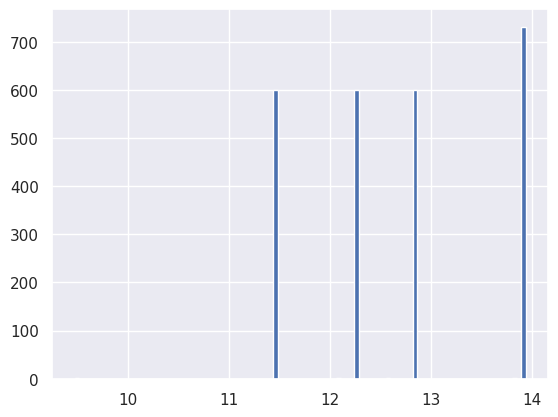

In [ ]:
plt.hist(np.log10(-np.diff(t)), bins=100);

In [ ]:
pd.to_timedelta(-np.unique(np.diff(t)))

TimedeltaIndex(['1 days 00:00:00', '0 days 18:00:00', '0 days 02:00:00',
                '0 days 01:00:00', '0 days 00:30:00', '0 days 00:20:00',
                '0 days 00:05:00', '0 days 00:00:03'],
               dtype='timedelta64[ns]', freq=None)

### Broadcast
https://numpy.org/doc/stable/user/basics.broadcasting.html

In [ ]:
u = np.unique(np.diff(t))
print(u.shape)
delta = np.diff(t)
print(delta.shape)
#delta = t[1:] - t[:-1]
display(delta[:5])


(8,)
(2535,)


array([-300000000000,   -3000000000, -300000000000, -300000000000,
       -300000000000])

In [ ]:
eq = u[..., np.newaxis]==delta
print(eq.shape)
print(eq[0,:])
print(eq[0,-1])


(8, 2535)
[False False False ...  True  True  True]
True


In [ ]:
freqt = np.sum(eq,axis=1)
print(np.sum(freqt))
display(freqt)


2535


array([731,   1, 600,   1, 600,   1, 600,   1])

### Narysujmy zliczenia
Let's draw the counters




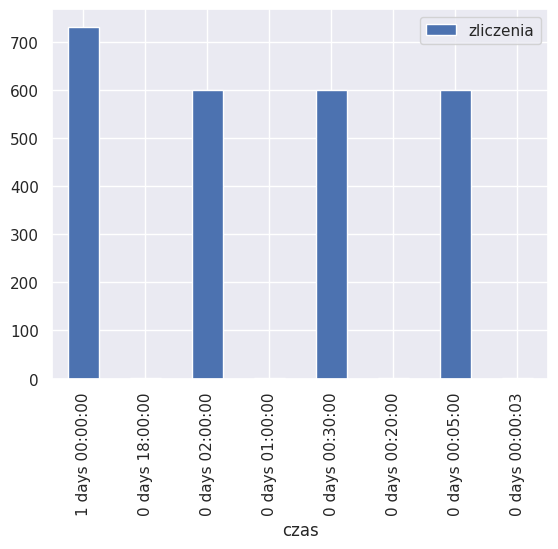

In [ ]:
pd.DataFrame(dict(zliczenia = np.sum(eq,axis=1), czas=pd.to_timedelta(-u ))).set_index('czas').plot.bar();

Widzimy, że zgodnie z dokumentacją mamy kilka grup pomiarów co:

- 5 min
- 30 min
- 2h
- 1 dzień

Da każdej grupy mamy ok 600 pomiarów.
Jaki jest łączny zakres logu?

We see that, according to the documentation, we have several groups of measurements every:

- 5 min
- 30 minutes
- 2 hours
- 1 Day

We have approximately 600 measurements for each group.
What is the total scope of the log?

#TASK 8: 30 min

Wybrać tylko te pliki, które maja pomiary co 30 min.

Select only the rows that have measurements every 30 minutes.

In [ ]:
df = counters.copy()
df = df.sort_values(by='timestamp')
d30m = pd.to_timedelta(30,unit='min')
d30s = pd.to_timedelta(30,unit='s')
idx = np.abs(np.diff(df.index)-d30m) < d30s
idx = np.concatenate([np.array([False]),idx], axis=0)
np.sum(idx)
display(df[idx])

,incoming,outgoing,max_incoming,max_outgoing
timestamp,,,,
2019-11-03 19:30:00,14502634,8858156,19731997,9935469
2019-11-03 20:00:00,24476210,12588143,55087510,24285268
2019-11-03 20:30:00,31132519,9088297,64281748,10891611
2019-11-03 21:00:00,12607808,11616398,21573726,18775643
2019-11-03 21:30:00,13342981,10654235,19184676,18775643
...,...,...,...,...
2019-11-16 05:00:00,9437059,9249561,9716821,27202051
2019-11-16 05:30:00,13484779,3677484,19795447,4445105
2019-11-16 06:00:00,7515049,6389895,11807677,9960817


In [ ]:
df30min = df.loc[idx,'incoming']
display(df30min.head())

a = df30min.to_numpy()
t = (df30min.index-df30min.index[0])/pd.to_timedelta(1,unit='h')
print(t[:10])

timestamp
2019-11-03 19:30:00    14502634
2019-11-03 20:00:00    24476210
2019-11-03 20:30:00    31132519
2019-11-03 21:00:00    12607808
2019-11-03 21:30:00    13342981
Name: incoming, dtype: int64

Index([0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5], dtype='float64', name='timestamp')


Text(0.5, 0, 't [h]')

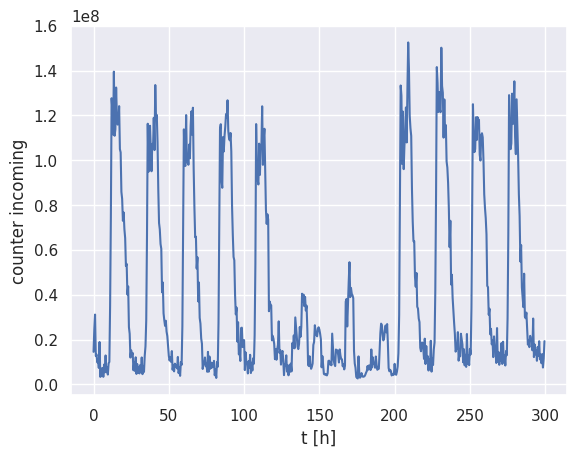

In [ ]:
plt.plot(t,a)
plt.ylabel('counter incoming')
plt.xlabel('t [h]')

Text(0.5, 0, 't [h]')

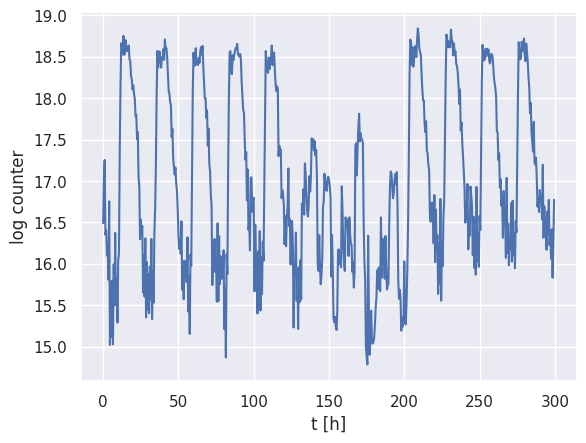

In [ ]:
#@title Wykres w skali logarytmiczne
# chart in logarithmic scale
plt.plot(t,np.log(a))
plt.ylabel('log counter')
plt.xlabel('t [h]')

## Periodyczność
Przeprowadzamy analiże okresowości w danych

Let's analyze the periodicity in the data


#TASK 8: Przeprowadzamy analiże okresowości w danych

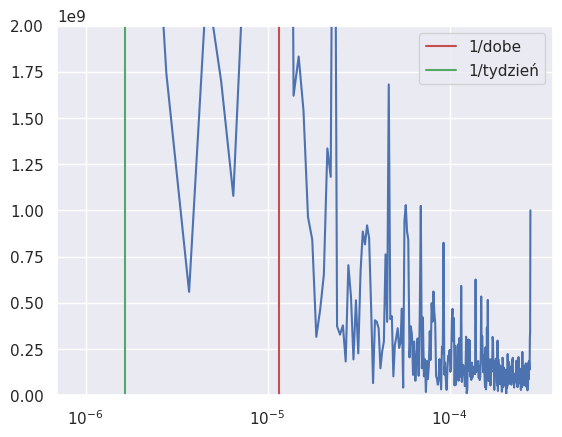

In [ ]:
spectrum=np.fft.rfft(a)
n = a.size
timestep = 0.5*60*60 # 0.5h w s

freq = np.fft.rfftfreq(n, d=timestep)

plt.plot(freq,(np.abs(spectrum)))
plt.xscale('log')
plt.axvline(x=1/(24*60*60),label='1/dobe',color='r')
plt.axvline(x=1/(7*24*60*60),label='1/tydzień',color='g')
plt.ylim(0,2e9)
plt.legend();
#plt.yscale('log')

# JAX

Uczenie masyznowe a szczególnie sieci neuronowe potrzebują gradientów (pochodnych)

Biblioteka daje takie możliwości i wiele innych

Machine learning and especially neural networks need gradients (derivatives)

The library offers these possibilities and many more
(Autodiff)


In [ ]:
x = jnp.linspace(-2,2,100)

def sq(x):
    # was x*x
    return x*x*x + x*2

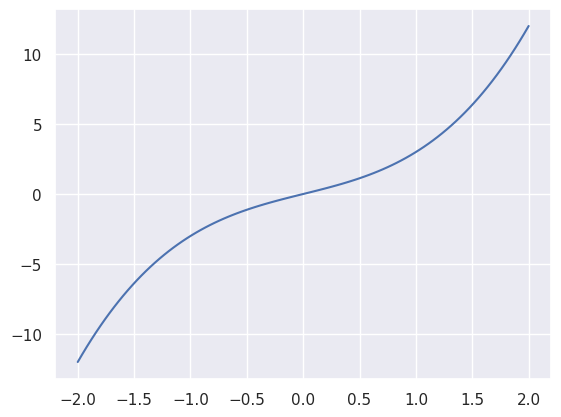

In [ ]:
plt.plot(x,jax.vmap(sq)(x))

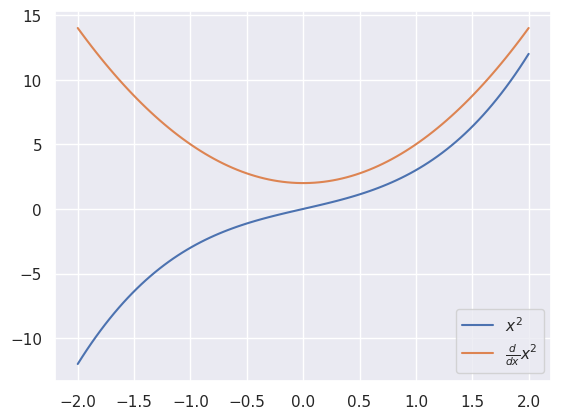

In [ ]:
pochodna = jax.grad(sq)
pochodna = jax.vmap(pochodna)
pochodna = jax.jit(pochodna)

plt.plot(x,jax.vmap(sq)(x), label=r'$x^2$')
plt.plot(x,pochodna(x), label=r'$\frac{d}{dx}x^2$')
plt.legend()